# Expectation Maximization (EM)

<div style="width: 100%; overflow: hidden;">
     <div style="width: 75%; float: left;">
         <p>
         The Expectation Maximization (EM) is a well-known unsupervised learning algorithm, which is often used to cluster unlabelled data in a Gaussian Mixture Model (GMM). In this example, EM is employed in a multi-variate fashion to identify 2 groups of pixel intensities in an image.
         </p>
         <br>
         <img src="./img/em-fit_anim.gif" style="width:750px;text-align:left;vertical-align: middle;"/><br>
         last update: 22/09/2021
     </div>
     <div style="margin-left: 80%;">
        <b>Author</b><br><br>
        <a href='http://www.christopherhahne.de', style="text-decoration: None; text-align: left;">
            <img align="left" src="http://www.christopherhahne.de/images/about.jpg" width="78"/>
            <br><br><br><br><br><br>
            <b>Christopher<br>Hahne, PhD</b>
        </a>
    </div>
</div>

## Expectation Optimization Model

### Likelihood and its logarithm

Let any observed data be denoted by $\mathbf{X}\in\mathrm{R}^{N\times M}$ with $N$ samples and $M$ features so that $\mathbf{X}=\left[x_1^{(m)}, x_2^{(m)}, x_n^{(m)}, \dots, x_N^{(m)}\right]^\intercal$, which can be modelled as a joint probability density (or likelihood) function $\mathcal{N}\left(\cdot\right)$ by

$$
\mathcal{N}\left(\mathbf{X}|\boldsymbol\mu, \boldsymbol\Sigma\right) = \frac{\exp\left(-\frac{1}{2} ({\mathbf X}-{\boldsymbol\mu}){\boldsymbol\Sigma}^{-1}({\mathbf X}-{\boldsymbol\mu})^\intercal\right)}{\sqrt{(2\pi)^k |\boldsymbol\Sigma|}}
$$

where $\boldsymbol\mu \in \mathrm{R}^{1\times M}$ and $\boldsymbol\Sigma \in \mathrm{R}^{M\times M}$ represent the mean and covariance across features, respectively.

<div class="alert alert-block alert-info"><b>Note:</b> The terms around $\boldsymbol\Sigma^{-1}$ have a swapped transpose with regards to the conventional notation in order to comply with the above matrix and vector dimensions, which are governed by the multivariate normal implementation.
</div>

The logarithm comes in handy as it allows to write

$$
\log \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu, \boldsymbol\Sigma\right) = -\frac{1}{2}\log|\boldsymbol\Sigma| -\frac{1}{2} ({\mathbf X}-{\boldsymbol\mu}){\boldsymbol\Sigma}^{-1}({\mathbf X}-{\boldsymbol\mu})^\intercal
$$

for the sake of convenience.

### Multi-variate Gaussian Mixture Model (GMM)

To account for multiple modes in $\mathbf{X}$, our joint probability density (or likelihood) function is extended to a Gaussian Mixture Model (GMM), which reads

$$
p(\mathbf{X}, \boldsymbol\theta) = \sum_k^K \pi_k \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)
$$

where $\boldsymbol\theta:=\{\pi_k, \boldsymbol\mu_k, \boldsymbol\Sigma_k\}$ represents the unknown mixture parameters with $k \in \{1, 2, \dots, K\}$ as the Gaussian component index and $K$ as its total number. Note that the mixing coefficient is in accordance with $0\le \pi_k \le 1$ and $\sum_{k=1}^K \pi_k=1$.

### Latent variable

A key concept of the likelihood function $p(\mathbf{X}, \boldsymbol\theta)$ can be represented as a conditional distribution $p(\mathbf{X} | \mathbf{z}, \boldsymbol\theta)$ containing latent variables $\mathbf{z}:=z_n$ which indicate the probability at which observed points $\mathbf{x}_n$ are assigned to a cluster $k$, i.e. describing how probable it is that $\mathbf{x}_n$ is drawn from the real distribution component $k$.

$$
p(\mathbf{X}, \boldsymbol\theta) = \int p(\mathbf{X} | \mathbf{z}, \boldsymbol\theta)p(\mathbf{z}) \,\mathrm{d}\mathbf{z}
$$

and marginalizing out the latent variables $\mathbf{z}$ via integration.

### Optimization

According to the above statements, the GMM-based log-likelihood writes

$$
L_{\mathbf{X}}(\boldsymbol\theta) = \sum_n^N \log p(\mathbf{x}_n, \boldsymbol\theta) = \sum_n^N \log \sum_k^K \pi_k \mathcal{N}\left(\mathbf{x}_n|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)
$$

where $L_{\mathbf{X}}(\boldsymbol\theta)$ represents the Maximum Likelihood Estimate (MLE) with $\mathbf{X}$ in the subscript signifying that the MLE is bound to $\mathbf{X}$. In the context of optimization, it is our goal to minimize the negative logarithm of the MLE, i.e. $-L_{\mathbf{x}}(\boldsymbol\theta)$. The objective function we aim to solve can thus be formulated as

$$
\hat{\boldsymbol\theta} = \underset{\boldsymbol\theta}{\operatorname{arg max}}L_{\mathbf{X}}(\boldsymbol\theta) = \underset{\boldsymbol\theta}{\operatorname{arg max}}\left(\sum_n^N \log p\left(\mathbf{x}_n,\boldsymbol\theta\right)\right) = \underset{\boldsymbol\theta}{\operatorname{arg min}}\left(-\sum_n^N \log p\left(\mathbf{x}_n,\boldsymbol\theta\right)\right)
$$

which for simplification can be expressed as logarithmic likelihood.

## Expectation Maximization (EM) Algorithm

Let $Q(\boldsymbol\theta, \boldsymbol\theta^{(t)})$ represent the expected value of log-likelihood function given by

$$
Q(\boldsymbol\theta, \boldsymbol\theta^{(t)}) = \mathbb{E}_{\mathbf{z}|\mathbf{X}, \boldsymbol\theta^{(t)}}\left[\log L(\boldsymbol\theta; \mathbf{X}, \mathbf{z})\right]
$$

at each iteration step $t$.

### 1. *Expectation step*

For the expectation update procedure, the likelihood weights $w_n^{(k)}$ are computed by 

$$
w_n^{(k)} \leftarrow \frac{\pi_k\mathcal{N}(\mathbf{x}_n | \boldsymbol\mu_k, \boldsymbol\Sigma_k)}{\sum_{k=1}^K \pi_k\mathcal{N}(\mathbf{x}_n | \boldsymbol\mu_k, \boldsymbol\Sigma_k)}\, , \quad \forall k, \, \forall n
$$

which indicate the probability of a sample $\mathbf{x}_n$ belonging to a cluster component $k$. A Python implementation of the expectation is provided hereafter.

In [1]:
from scipy.stats import multivariate_normal

def expectation_step(data, pi, mu, cov):
    
    # likelihood weights (responsibilities)
    w = np.zeros([len(mu), len(data)])

    for k in range(len(mu)):
        # compute probability density function for each component k; KxN
        w[k, :] = pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=cov[k])

    # normalize all probability density function components
    w = np.divide(w, w.sum(axis=0), out=np.zeros_like(w)+np.spacing(1), where=w.sum(0) != 0)
    
    return w

### 2. *Maximization step*

In the second part, the maximization of $\boldsymbol\theta$ parameters can be written as

$$
\boldsymbol\theta^{(t+1)} = \underset{\boldsymbol\theta}{\operatorname{arg max}} Q(\boldsymbol\theta, \boldsymbol\theta^{(t)})
$$

for iteration $t$. This general update procedure breaks down to updating the mean $\boldsymbol\mu_k$, covariance $\boldsymbol\Sigma_k$ and mixing coefficients $\pi_k$ as follows

$$
\boldsymbol\mu_k \leftarrow \frac{\sum_{n=1}^{N} w_n^{(k)} \mathbf{x}_n}{\sum_{n=1}^{N} w_n^{(k)}}\, , \quad \forall k
$$

$$
\boldsymbol\Sigma_k \leftarrow \frac{\sum_{n=1}^{N} w_n^{(k)} \left(\mathbf{x}_n-\boldsymbol\mu_k\right)^\intercal\left(\mathbf{x}_n-\boldsymbol\mu_k\right)}{\sum_{n=1}^{N} w_n^{(k)}} \, , \quad \forall k
$$

$$
\pi_k \leftarrow \frac{1}{N} \sum_{n=1}^{N} w_n^{(k)} \, , \quad \forall k
$$

which mainly relies on the pre-computed $w_n^{(k)}$. At the end of this notebook proofs can be found for the above procedures which are implemented below as part of the maximization step.

In [2]:
def maximization_step(data, w):
    
    # power per component; KxN -> K
    p_comp = np.sum(w, axis=1)
    # update mixing coefficients
    pi = p_comp / len(data)
    # avoid zeros in denominator
    p_comp[p_comp == 0] = np.spacing(1)
    
    mu, cov = np.zeros([len(p_comp), data.shape[-1]]), np.zeros([len(p_comp), data.shape[-1], data.shape[-1]])
    for k in range(len(p_comp)):
        # update means
        mu[k] = np.dot(w[k, :], data) / p_comp[k]
        # update standard deviations
        cov[k] = np.dot(w[np.newaxis, k, :] * (data - mu[k]).T, data - mu[k]) / p_comp[k]
        #cov[k] = np.dot((data - mu[k]).T, w[k, :, np.newaxis] * (data - mu[k])) / p_comp[k]
        
    return pi, mu, cov

In [3]:
import numpy as np
np.random.seed(2048)

def em_algorithm(data, n_comp=None, s_mean=None, s_covs=None, pi=None, max_iter=20, tol=1e-13):
    """
    Expectation Maximization (EM)
    (i) initialize the likelihood
    (ii) estimate the log-likelihood
    (iii) find the partial derivative of the log-likelihood

    :param data: input data
    :param n_comp: number of mixture components
    :param s_mean: list of mean values
    :param s_covs: covariance matrix
    :param pi: mixing coefficients
    :param max_iter: maximum number of iterations
    :param tol: tolerance of log-likelihood as stop condition
    :return: aggregated lists of intermediate means, covariances, mixtures, latent variables and likelihoods
    """

    # dimensions init
    n_comp = len(s_mean) if n_comp is None and len(s_mean) > 1 else 2  # number of mixture components
    n_data = len(data)  # number of data points
    n_dims = data.shape[-1]  # number of multi-variate dimensions
    
    # parameter init
    gen_randcomps = lambda vmax, vmin, K, C: np.array([np.random.uniform(vmin, vmax, size=C) for _ in range(K)])
    pi = (1. / n_comp) * np.ones(n_comp) if pi is None else pi  # mixing coefficients
    mu = gen_randcomps(data.min(), data.max(), n_comp, n_dims)  # means of components
    cov = [np.diag(v) for v in gen_randcomps(data.max() / 50, data.max() / 25, n_comp, n_dims)]
    
    # lists init for intermediate results (log-likelihoods (lls), responsibilities, pi, mu, covariance)
    ll_list, w_list, pi_list, mu_list, cov_list = ([] for _ in range(5))

    for i in range(max_iter):

        w = expectation_step(data, pi, mu, cov)
        
        pi, mu, cov = maximization_step(data, w)
        
        ll_hood = np.sum(np.log(w.sum(axis=0)))
        
        ll_list.append(ll_hood)
        pi_list.append(pi.tolist())
        mu_list.append(mu)
        cov_list.append(cov)
        w_list.append(w)

        if len(ll_list) > 1 and 0 < ll_list[-1] - ll_list[-2] < tol:
            print('EM converged after %s iterations\n' % i)
            break

    return mu_list, cov_list, pi_list, w_list, ll_list

Unlike the k-means algorithm, EM provides a numerical likelihood for each sample indicating its cluster group membership. After convergence of the above two-step-iteration scheme, one can infer the per sample cluster correspondence from respective likelihood weights $w_n^{(k)}$ via

$$
\mathbf{z} = z_n = \underset{k}{\operatorname{arg max}} w_n^{(k)}
$$

## Image Segmentation using EM-based GMM

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
import os
import numpy as np

def get_image(url: str = None):

    # load image
    try:
        img = np.array(Image.open(requests.get(url, stream=True).raw))
    except (requests.exceptions.ConnectionError, requests.exceptions.MissingSchema) as e:
        fp_alt = os.path.join('.', 'img', url.split('/')[-1])
        if os.path.exists(fp_alt):
            img = np.array(Image.open(fp_alt))
        else:
            raise e

    # downsample
    img = img[::2, ::2, ...]

    # color channel treatment
    if img.shape[-1] != 3:
        if img.shape[-1] == 4:
            img = img[..., :3]
        else:
            img = np.repeat(img[..., np.newaxis], 3, axis=-1)

    # pre-processing (normalization)
    th_min = 0
    th_max = 100 - th_min
    norm = lambda ch: (ch-np.percentile(ch, th_min))/(np.percentile(ch, th_max)-np.percentile(ch, th_min))
    # white balance
    if th_min != 0:
        img = np.round(norm(img)*255)
        img[img > 255] = 255
        img[img < 0] = 0
    else:
        img = np.dstack([norm(ch).T for ch in np.swapaxes(img, 0, -1)]) if True else img

    return img

# load image
import imageio.v2 as imageio
from pathlib import Path
path = Path('.') / 'img' / 'cat.png'
img = imageio.imread(str(path))[..., :3]
print(img.shape)

(582, 1044, 3)


In [5]:
# run expectation maximization
data = img.reshape(-1, img.shape[-1])
n_comp = 2
s_mean = [[0, 255, 0], [255, 0, 255]]
mu_list, cov_list, pi_list, w_list, ll_hoods = em_algorithm(data=data, n_comp=n_comp, s_mean=s_mean)

# print results
print("means: %s" % mu_list[-1])
print("stds: %s" % cov_list[-1])
print("coeffs: %s" % pi_list[-1])

EM converged after 7 iterations

means: [[ 36.71553252 146.34193747   2.98564552]
 [112.90365771 100.46290007  66.356887  ]]
stds: [[[ 114.26950354   49.33405596   72.08390326]
  [  49.33405596  206.33681206   16.26701334]
  [  72.08390326   16.26701334   51.68563452]]

 [[1337.63768487 1140.9310725   827.49339969]
  [1140.9310725  1065.67473023  738.75384396]
  [ 827.49339969  738.75384396  580.05304964]]]
coeffs: [0.8506291176876932, 0.1493708823123066]


### Convergence Graph

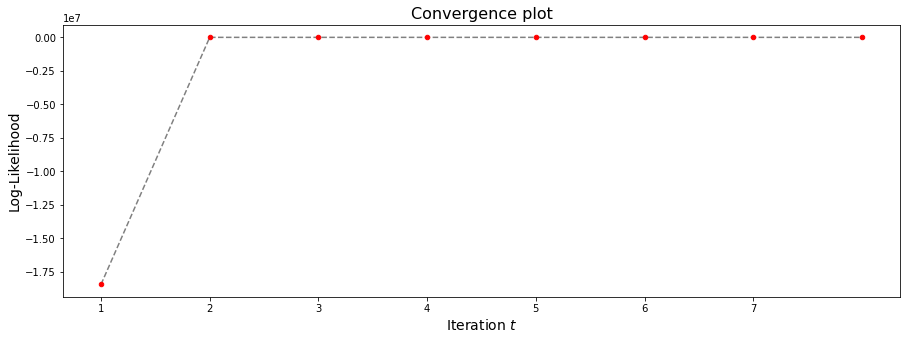

In [6]:
if ll_hoods:
    plt.figure(figsize=(15, 5))
    plt.title('Convergence plot', fontsize=16)
    plt.plot(np.array(ll_hoods), color='gray', linestyle='--')
    plt.plot(np.array(ll_hoods), color='red', linestyle='', marker='.', markersize=9)
    plt.xlabel('Iteration $t$', fontsize=14)
    plt.xticks(np.arange(len(ll_hoods)-1), np.arange(1, len(ll_hoods), 1))
    plt.ylabel('Log-Likelihood', fontsize=14)

### Animated Results

In [7]:
def plot_3d_distribution(data, mu, cov, latent_vars, ax=None):

    if ax is None:
        fig = plt.figure()

    # remove previous plot data
    ax.clear()
    ax.set_xlabel('Red', fontsize=18)
    ax.set_ylabel('Green', fontsize=18)
    ax.set_zlabel('Blue', fontsize=18)
    ax.set_xlim(0, 255)
    ax.set_ylim(0, 255)
    ax.set_zlim(0, 175)

    colors = ['green', 'orange']
    
    # iterate through clusters
    for i, (c, m) in enumerate(zip(np.unique(latent_vars), mu)):

        # plot cluster points
        group = data[latent_vars == c]
        ax.scatter(group[..., 0], group[..., 1], zs=group[..., 2], zdir='z', s=5,
                   c=colors[i % len(mu)], alpha=.025, label='Cluster #'+str(i+1))

        # plot mean value
        ax.scatter(m[0], m[1], m[2], s=100, c='red', marker='+')

        # decompose covariance in eigenvalues (variance) and eigenvectors (component directions)
        eig_vals, eig_vecs = np.linalg.eig(cov[i])

        # compute radii (standard deviation) from variance
        r = eig_vals**.5

        # create ellipsoid coordinates
        csamples = complex(0, 31)
        phi, theta = np.mgrid[0:np.pi:csamples, 0:2*np.pi:csamples]
        x = r[0] * np.sin(phi) * np.cos(theta)
        y = r[1] * np.sin(phi) * np.sin(theta)
        z = r[2] * np.cos(phi)

        # comply with right-hand rule and world frame convention
        eig_vecs[:, 2] = np.cross(eig_vecs[:, 0], eig_vecs[:, 1])

        # rotation matrix
        rot_mat = np.array([eig_vecs[:, 0], eig_vecs[:, 1], eig_vecs[:, 2]]).transpose()

        # rotate and translate ellipsoid coordinates
        x, y, z = np.dot(rot_mat, np.array([x.flatten(), y.flatten(), z.flatten()]))
        x, y, z = x + mu[i][0], y + mu[i][1], z + mu[i][2]
        xx, yy, zz = np.array([x.reshape(phi.shape), y.reshape(phi.shape), z.reshape(phi.shape)])

        ax.plot_wireframe(xx, yy, zz, color='purple', alpha=.15, label='Covariance #'+str(i+1))


def plot_2d_image_segmentation(img, r, axs=None):

    fig, axs = plt.subplots(3, 1) if axs is None else (None, axs)
    axs[0].imshow(img)
    axs[1].imshow(img * np.repeat(r.argmax(axis=0), 3, axis=-1).reshape(img.shape))
    axs[2].imshow(img * np.repeat(r.argmin(axis=0), 3, axis=-1).reshape(img.shape))


def em_iterations_anim(data, mu_list, cov_list, r_list, shape, save_opt=False, style_opt=False):

    nrows = 3
    ncols = 3
    from matplotlib import gridspec
    gs = gridspec.GridSpec(nrows=nrows, ncols=ncols)

    fig = plt.figure(figsize=(15, 8))
    axs = []
    titles = ['original', 'pixel cluster #1', 'pixel cluster #2']
    for i in range(nrows):
        axs.append(fig.add_subplot(gs[i, 0]))
        axs[i].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
        axs[i].set_title(titles[i], y=-0.2)

    axs.append(fig.add_subplot(gs[:, 1:ncols], projection='3d'))
    axs[-1].view_init(elev=30, azim=160)
    axs[-1].set_xlabel('Red')
    axs[-1].set_ylabel('Green')
    axs[-1].set_zlabel('Blue')

    def update(i):

        latent_vars = r_list[i].argmax(axis=0)
        plot_2d_image_segmentation(data.reshape(shape), r_list[i], axs=axs[:-1])
        plot_3d_distribution(data, mu_list[i], cov_list[i], latent_vars, ax=axs[-1])

        return axs,
    
    import matplotlib as mpl
    if style_opt:
        mpl.rcParams['savefig.facecolor'] = '#148ec8'
        fig.set_facecolor('#148ec8')
        for ax in axs:
            ax.set_facecolor('#148ec8')
            ax.set_title(label=ax.get_title(), fontdict={'color': 'white', 'size': 24}, y=1.0)
            ax.spines['bottom'].set_color('white')
            ax.spines['top'].set_color('white')
            ax.spines['left'].set_color('white')
            ax.spines['right'].set_color('white')
            ax.xaxis.label.set_color('white')
            ax.yaxis.label.set_color('white')
            ax.tick_params(colors='white')
            try:
                ax.zaxis.label.set_color('white')
                ax.w_xaxis.line.set_color("white")
                ax.w_yaxis.line.set_color("white")
                ax.w_zaxis.line.set_color("white")
            except:
                pass
    else:
        mpl.rcParams['savefig.facecolor'] = '#ffffff'
        fig.set_facecolor('#ffffff')
        for ax in axs:
            ax.set_title(label=ax.get_title(), fontdict={'color': 'black', 'size': 24}, y=1.0)
    
    from matplotlib import animation
    plt.tight_layout()
    anim = animation.FuncAnimation(fig, update, frames=len(mu_list), interval=1000)
    plt.close()
            
    if save_opt:
        anim.save('./em-fit_anim.gif', dpi=50, writer='imagemagick')

    return anim

In [8]:
from IPython.display import HTML
anim = em_iterations_anim(data, mu_list, cov_list, w_list, img.shape)
HTML(anim.to_jshtml())

### Comparison with [GaussianMixture()](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) from [sklearn](https://scikit-learn.org/)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=n_comp, max_iter=20, tol=1e-13, covariance_type='full')
gm.fit(img.reshape(-1, img.shape[-1]))

#### Means

In [ ]:
gm.means_

In [ ]:
np.array(mu_list[-1])

#### Covariances

In [ ]:
gm.covariances_

In [ ]:
np.array(cov_list[-1])

### Proofs

Furher above in this notebook, the update assignments for $\boldsymbol\mu_k, \boldsymbol\Sigma_k, \pi_k$ have been presented. Proofs for these update equations are demonstrated in the following and verified using Deisenroth *et al.* (mml-book.github.io). As with other traditional optimization procedures, we start off by analyzing partial derivatives in the objective function and then set these to zero.

#### Mean derivation

The partial derivative of the log-likelihood with regards to $\boldsymbol\mu_k$ writes

$$
\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\mu_k} = \sum^N_{n=1}\frac{\partial \log p(\mathbf{x}_n, \boldsymbol\theta)}{\partial\boldsymbol\mu_k}
$$

and requires to invoke the chain rule

$$
\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\mu_k} = \sum^N_{n=1}\frac{1}{p(\mathbf{x}_n, \boldsymbol\theta)} \frac{\partial p(\mathbf{x}_n, \boldsymbol\theta)}{\partial\boldsymbol\mu_k}
$$

while

$$
\frac{\partial p(\mathbf{x}_n, \boldsymbol\theta)}{\partial\boldsymbol\mu_k} = \sum_k^K \pi_k \frac{\partial\mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}{\partial\boldsymbol\mu_k} = \pi_k \frac{\partial\mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}{\partial\boldsymbol\mu_k}
$$

and

$$
\frac{\partial p(\mathbf{x}_n, \boldsymbol\theta)}{\partial\boldsymbol\mu_k} = \pi_k \left(\mathbf{x}_n-\boldsymbol\mu_k\right) \boldsymbol\Sigma_k^{-1} \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)
$$

The combined chain rule then reads

$$
\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\mu_k} = \sum^N_{n=1}\frac{\pi_k \left(\mathbf{x}_n-\boldsymbol\mu_k\right) \boldsymbol\Sigma_k^{-1} \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}{p(\mathbf{x}_n, \boldsymbol\theta)}
$$

where we substitute the classical GMM function for $p(\mathbf{x}_n, \boldsymbol\theta)$ (see definitions above) to obtain

$$
\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\mu_k} = \sum^N_{n=1}\frac{\pi_k \left(\mathbf{x}_n-\boldsymbol\mu_k\right) \boldsymbol\Sigma_k^{-1} \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}{\sum^K_{k=1} \pi_k \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}
$$

which gets rearranged to

$$
\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\mu_k} = \sum^N_{n=1} \frac{\pi_k \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}{\sum^K_{k=1} \pi_k \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)} \left(\mathbf{x}_n-\boldsymbol\mu_k\right) \boldsymbol\Sigma_k^{-1}
$$

and

$$
\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\mu_k} = \sum^N_{n=1} w_n^{(k)} \left(\mathbf{x}_n-\boldsymbol\mu_k\right) \boldsymbol\Sigma^{-1} ,\quad \text{where} \quad w_n^{(k)} = \frac{\pi_k \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}{\sum^K_{k=1} \pi_k \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}
$$

Setting $\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\mu_k} = \mathbf{0}$ with $\mathbf{0} \in \mathrm{R}^{1\times M}$, we get

$$
\mathbf{0} = \sum^N_{n=1} w_n^{(k)} \left(\mathbf{x}_n-\boldsymbol\mu_k\right)\boldsymbol\Sigma^{-1}
$$

$$
\mathbf{0} = \sum^N_{n=1} w_n^{(k)} \left(\mathbf{x}_n-\boldsymbol\mu_k\right)
$$

$$
\mathbf{0} = \sum^N_{n=1} w_n^{(k)} \mathbf{x}_n - \sum^N_{n=1} w_n^{(k)} \boldsymbol\mu_k
$$

and rearranging to the means yields

$$
\sum^N_{n=1} w_n^{(k)} \boldsymbol\mu_k = \sum^N_{n=1} w_n^{(k)} \mathbf{x}_n
$$

with the final update function

$$
\boldsymbol\mu_k = \frac{\sum^N_{n=1} w_n^{(k)} \mathbf{x}_n}{\sum^N_{n=1} w_n^{(k)}} \, , \quad \forall n, \forall k
$$

### Covariance derivation

The partial derivative of the log-likelihood with regards to the covariance writes as follows

$$
\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\Sigma_k} = \sum^N_{n=1}\frac{\partial \log p(\mathbf{x}_n, \boldsymbol\theta)}{\partial\boldsymbol\Sigma_k}
$$

where the chain rule is invoked so that

$$
\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\Sigma_k} = \sum^N_{n=1}\frac{1}{p(\mathbf{x}_n, \boldsymbol\theta)} \frac{\partial p(\mathbf{x}_n, \boldsymbol\theta)}{\partial\boldsymbol\Sigma_k}
$$

and

$$
\frac{\partial p(\mathbf{x}_n, \boldsymbol\theta)}{\partial\boldsymbol\Sigma_k} = \frac{\partial}{\partial\boldsymbol\Sigma_k}\left(\frac{\exp\left(-\frac{1}{2} (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal\right)}{\sqrt{(2\pi)^{\text{rank}\left(\mathbf{\Sigma}_k\right)} |\mathbf{\Sigma}_k |}} \right)
$$

Since $\text{rank}\left(\mathbf{\Sigma}_k\right)=M$, this is arranged to

$$
\frac{\partial p(\mathbf{x}_n, \boldsymbol\theta)}{\partial\boldsymbol\Sigma_k} = \frac{\pi_k}{(2\pi)^{M}} \frac{\partial}{\partial\boldsymbol\Sigma_k}\left(\frac{\exp\left(-\frac{1}{2} (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal\right)}{\sqrt{|\mathbf{\Sigma}_k |}} \right)
$$

for which the product rule is employed by

$$
\frac{\partial}{\partial\boldsymbol\Sigma_k} \frac{1}{\sqrt{|\mathbf{\Sigma}_k |}} = -\frac{1}{2} \frac{1}{\sqrt{|\mathbf{\Sigma}_k|}} \, \mathbf{\Sigma}_k^{-1}
$$

and

$$
\frac{\partial}{\partial\boldsymbol\Sigma_k} \exp\left(-\frac{1}{2} (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal\right) = -\mathbf{\Sigma}^{-1}_k(\mathbf{x}_n-\boldsymbol\mu_k)^\intercal (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k \exp\left(-\frac{1}{2} (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal\right)
$$

to put this together to obtain

$$
\frac{\partial p(\mathbf{x}_n, \boldsymbol\theta)}{\partial\boldsymbol\Sigma_k} = \frac{\pi_k}{(2\pi)^{M}} \left(-\frac{1}{2}\frac{\exp\left(-\frac{1}{2} (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal\right)\mathbf{\Sigma}_k^{-1}}{\sqrt{|\mathbf{\Sigma}_k|}} + \frac{-\mathbf{\Sigma}^{-1}_k(\mathbf{x}_n-\boldsymbol\mu_k)^\intercal (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k \exp\left(-\frac{1}{2} (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal\right) }{\sqrt{|\mathbf{\Sigma}_k |}} \right)
$$

A shorter version of this writes

$$
\frac{\partial p(\mathbf{x}_n, \boldsymbol\theta)}{\partial\boldsymbol\Sigma_k} = \frac{\pi_k}{(2\pi)^{M}} \exp\left(-\frac{1}{2} (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal\right) \left(-\frac{1}{2}\frac{\mathbf{\Sigma}_k^{-1}}{\sqrt{|\mathbf{\Sigma}_k|}} - \frac{\mathbf{\Sigma}^{-1}_k(\mathbf{x}_n-\boldsymbol\mu_k)^\intercal (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k}{\sqrt{|\mathbf{\Sigma}_k |}} \right)
$$

and further

$$
\frac{\partial p(\mathbf{x}_n, \boldsymbol\theta)}{\partial\boldsymbol\Sigma_k} = \frac{\pi_k}{(2\pi)^{M}} \frac{\exp\left(-\frac{1}{2} (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal\right)}{\sqrt{|\mathbf{\Sigma}_k |}} \left(-\frac{1}{2}\mathbf{\Sigma}_k^{-1} - \mathbf{\Sigma}^{-1}_k(\mathbf{x}_n-\boldsymbol\mu_k)^\intercal (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k \right)
$$

to yield

$$
\frac{\partial p(\mathbf{x}_n, \boldsymbol\theta)}{\partial\boldsymbol\Sigma_k} = \pi_k \mathcal{N}(\mathbf{x}_n, \boldsymbol\mu_k, \boldsymbol\Sigma_k) \left(-\frac{1}{2}\mathbf{\Sigma}_k^{-1} - \mathbf{\Sigma}^{-1}_k(\mathbf{x}_n-\boldsymbol\mu_k)^\intercal (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k \right)
$$

Plugging in for $\frac{\partial p(\mathbf{x}_n, \boldsymbol\theta)}{\partial\boldsymbol\Sigma_k}$ gives

$$
\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\Sigma_k} = \frac{\pi_k \mathcal{N}(\mathbf{x}_n, \boldsymbol\mu_k, \boldsymbol\Sigma_k)}{p(\mathbf{x}_n, \boldsymbol\theta)} \left(-\frac{1}{2}\mathbf{\Sigma}_k^{-1} - \mathbf{\Sigma}^{-1}_k(\mathbf{x}_n-\boldsymbol\mu_k)^\intercal (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k \right)
$$

where we substitute the classical GMM function for $p(\mathbf{x}_n, \boldsymbol\theta)$ (see definitions above) to obtain

$$
\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\Sigma_k} = \sum^N_{n=1}\frac{\pi_k \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}{\sum^K_{k=1} \pi_k \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)} \left(-\frac{1}{2}\mathbf{\Sigma}_k^{-1} - \mathbf{\Sigma}^{-1}_k(\mathbf{x}_n-\boldsymbol\mu_k)^\intercal (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k \right)
$$

which is simplified to

$$
\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\Sigma_k} = -\frac{1}{2} \sum^N_{n=1} w_n^{(k)} \left(\mathbf{\Sigma}_k^{-1} - \mathbf{\Sigma}^{-1}_k (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal (\mathbf{x}_n-\boldsymbol\mu_k) \mathbf{\Sigma}^{-1}_k \right) ,\quad \text{where} \quad w_n^{(k)} = \frac{\pi_k \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}{\sum^K_{k=1} \pi_k \mathcal{N}\left(\mathbf{X}|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}
$$

and rearranged so that

$$
\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\Sigma_k} = -\frac{1}{2} \sum^N_{n=1} w_n^{(k)} \mathbf{\Sigma}_k^{-1} + \frac{1}{2} \mathbf{\Sigma}^{-1}_k \left(\sum^N_{n=1} w_n^{(k)} (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal (\mathbf{x}_n-\boldsymbol\mu_k)\right) \mathbf{\Sigma}^{-1}_k
$$

Setting $\frac{\partial L_{\mathbf{X}}(\boldsymbol\theta)}{\partial\boldsymbol\Sigma_k} = \mathbf{0}$ yields

$$
\mathbf{0} = -\frac{1}{2} \sum^N_{n=1} w_n^{(k)} \mathbf{\Sigma}_k^{-1} + \frac{1}{2} \mathbf{\Sigma}^{-1}_k \left(\sum^N_{n=1} w_n^{(k)} (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal (\mathbf{x}_n-\boldsymbol\mu_k)\right) \mathbf{\Sigma}^{-1}_k
$$

which after rearranging becomes

$$
\sum^N_{n=1} w_n^{(k)} \mathbf{\Sigma}_k^{-1} = \mathbf{\Sigma}^{-1}_k \left(\sum^N_{n=1} w_n^{(k)} (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal (\mathbf{x}_n-\boldsymbol\mu_k)\right) \mathbf{\Sigma}^{-1}_k
$$

and

$$
\sum^N_{n=1} w_n^{(k)} = \left(\sum^N_{n=1} w_n^{(k)} (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal (\mathbf{x}_n-\boldsymbol\mu_k)\right) \mathbf{\Sigma}^{-1}_k
$$

to the final update equation

$$
\mathbf{\Sigma}_k = \frac{\sum^N_{n=1} w_n^{(k)} (\mathbf{x}_n-\boldsymbol\mu_k)^\intercal (\mathbf{x}_n-\boldsymbol\mu_k)}{\sum^N_{n=1} w_n^{(k)}} \, , \quad \forall n, \forall k
$$

## Mixture weights

For the derivation of the mixture weights we use the log-likelihood and a Lagrangian term with $\lambda$ by

$$
\mathfrak{L} = \log L_{\mathbf{X}}(\boldsymbol\theta) + \lambda\left(\sum_{k=1}^K \pi_k - 1\right)
$$

while the regularization enforces the $\sum_k^K \pi_k=1$ requirement.

$$
\mathfrak{L} = \sum_{n=1}^N \log \sum_{k=1}^K \pi_k \mathcal{N}\left(\mathbf{x}_n|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right) + \lambda\left(\sum_{k=1}^K \pi_k - 1\right)
$$

The partial derivatives write

$$
\frac{\partial\mathfrak{L}}{\partial\pi_k} = \sum_{n=1}^N\frac{\mathcal{N}\left(\mathbf{x}_n|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}{\sum_k^K\pi_k \mathcal{N}\left(\mathbf{x}_n|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)} + \lambda = \frac{1}{\pi_k} \sum_{n=1}^N\frac{\pi_k\mathcal{N}\left(\mathbf{x}_n|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}{\sum_k^K\pi_k \mathcal{N}\left(\mathbf{x}_n|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)} + \lambda
$$

$$
\frac{\partial\mathfrak{L}}{\partial\lambda} = \sum_{k=1}^K \pi_k - 1
$$

When setting $\frac{\partial\mathfrak{L}}{\partial\lambda} = \mathbf{0}$ and $\frac{\partial\mathfrak{L}}{\partial\pi_k} = \mathbf{0}$, we may rearrange the derived functions to 

$$
\lambda = -\sum_{n=1}^N\frac{\mathcal{N}\left(\mathbf{x}_n|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}{\sum_k^K\pi_k \mathcal{N}\left(\mathbf{x}_n|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)} = -N
$$

and

$$
\pi_k = -\frac{1}{\lambda}\sum_{n=1}^N\frac{\pi_k\mathcal{N}\left(\mathbf{x}_n|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)}{\sum_k^K\pi_k \mathcal{N}\left(\mathbf{x}_n|\boldsymbol\mu_k, \boldsymbol\Sigma_k\right)} = -\frac{1}{\lambda} \sum^N_{n=1} w_n^{(k)}
$$

which after substitution becomes

$$
\pi_k = \frac{1}{N}\sum^N_{n=1} w_n^{(k)} \, , \quad \forall k
$$